## Classification Excercise

### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br>

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context

**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

# Table of Content

1. Data Preprocessing - **3 Marks**
2. Logistic Regression Model - **3 Marks**
3. Decision Tree Model - **3 Marks**
4. Random Forest Model - **3 Marks**
5. XGBoost Model - **3 Marks**
6. K Nearest Neighbors Model - **3 Marks**
7. Naive Bayes Model - **3 Marks**
8. Compare the Results of all the above mentioned algorithms - **4 Marks**
9. Intrepret your solution based on the results - **5 Marks**


<a id="logreg"> </a>
## 1. Data Pre-Processing

**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score, recall_score, f1_score,confusion_matrix,cohen_kappa_score,roc_curve,auc,log_loss,precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

#### Load the csv file

In [2]:
df= pd.read_csv('bank (1).csv')

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Prepare the data </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0,no
1,32,691,10,999,0,1.4,93.918,-42.7,4.960,5228.1,yes
2,45,45,8,999,0,1.4,93.444,-36.1,4.963,5228.1,no
3,33,400,1,5,2,-1.1,94.601,-49.5,1.032,4963.6,yes
4,47,903,2,999,1,-1.8,93.075,-47.1,1.415,5099.1,yes


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000
mean,40.286618,379.564004,2.349170,893.100519,0.306120,-0.460218,93.485750,-40.265373,3.003616,5137.407147
std,11.901274,354.768370,2.384519,306.531615,0.684605,1.717852,0.631366,5.322795,1.886179,86.347481
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,141.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.250000,5076.200000
50%,38.000000,260.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.076000,5191.000000
75%,48.000000,512.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,4199.000000,42.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.shape

(9640, 11)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Perform an analysis for missing values </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
null_columns = df.columns[df.isnull().any()]
print(null_columns)
for column in null_columns:
  print(column)

Index([], dtype='object')


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Remove the outliers (if any) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.75)
Q3 = Q2 - Q1
thershold = 1.5
outliers = ((df<Q1 - thershold * Q3) | (df>Q2 + thershold *Q3))
print(outliers)
for column in outliers:
  if any(outliers[column]):
    print(column)

        age  campaign  cons.conf.idx  cons.price.idx  duration  emp.var.rate  \
0     False     False          False           False     False         False   
1     False      True          False           False     False         False   
2     False      True          False           False     False         False   
3     False     False          False           False     False         False   
4     False     False          False           False     False         False   
...     ...       ...            ...             ...       ...           ...   
9635  False     False          False           False     False         False   
9636  False     False          False           False     False         False   
9637  False     False          False           False     False         False   
9638  False     False          False           False     False         False   
9639  False     False          False           False     False         False   

      euribor3m  nr.employed  pdays  pr

<ipython-input-7-c5d0e5040e32>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-7-c5d0e5040e32>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q2 = df.quantile(0.75)
<ipython-input-7-c5d0e5040e32>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df<Q1 - thershold * Q3) | (df>Q2 + thershold *Q3))


In [8]:
remove_outliers = df[~outliers.any(axis = 1)]
print(remove_outliers)

      age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0      32       205         2    999         0           1.1          93.994   
5      25       243         3    999         0          -1.8          92.843   
6      36       214         1    999         0          -0.1          93.200   
7      43       550         1    999         0           1.1          93.994   
8      52        64         1    999         0           1.1          93.994   
...   ...       ...       ...    ...       ...           ...             ...   
9634   30       475         5    999         0          -3.4          92.379   
9635   37       854         3    999         0           1.4          94.465   
9636   40       353         2    999         0           1.4          93.918   
9638   39       233         1    999         0           1.4          94.465   
9639   35       417         1    999         0           1.4          94.465   

      cons.conf.idx  euribor3m  nr.empl

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Separate the dependent and the independent variables. Also, in the target variable, replace yes with 0 and no with 1 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
yes_no = 'y'
df[yes_no] = df[yes_no].replace({'yes':0,'no':1})
print(df['y'])

0       1
1       0
2       1
3       0
4       0
       ..
9635    1
9636    1
9637    1
9638    1
9639    1
Name: y, Length: 9640, dtype: int64


In [10]:
dependent_variable = 'y'
print("Dependent Variable:")
print(dependent_variable)

Dependent Variable:
y


In [11]:
independent_variable = df.drop(columns = [dependent_variable])
print("\nIndependent Variable")
print(independent_variable.columns)


Independent Variable
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Remove the unnecessary variables that will not contribute to the model. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
unnecessary =['duration','campaign','pdays','previous','euribor3m']
unnecessary_columns = df.drop(columns = unnecessary)
print(unnecessary_columns)

      age  emp.var.rate  cons.price.idx  cons.conf.idx  nr.employed  y
0      32           1.1          93.994          -36.4       5191.0  1
1      32           1.4          93.918          -42.7       5228.1  0
2      45           1.4          93.444          -36.1       5228.1  1
3      33          -1.1          94.601          -49.5       4963.6  0
4      47          -1.8          93.075          -47.1       5099.1  0
...   ...           ...             ...            ...          ... ..
9635   37           1.4          94.465          -41.8       5228.1  1
9636   40           1.4          93.918          -42.7       5228.1  1
9637   42          -0.1          93.200          -42.0       5195.8  1
9638   39           1.4          94.465          -41.8       5228.1  1
9639   35           1.4          94.465          -41.8       5228.1  1

[9640 rows x 6 columns]


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Plot the distribution of all the numeric variables and find the value of skewness for each variable. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

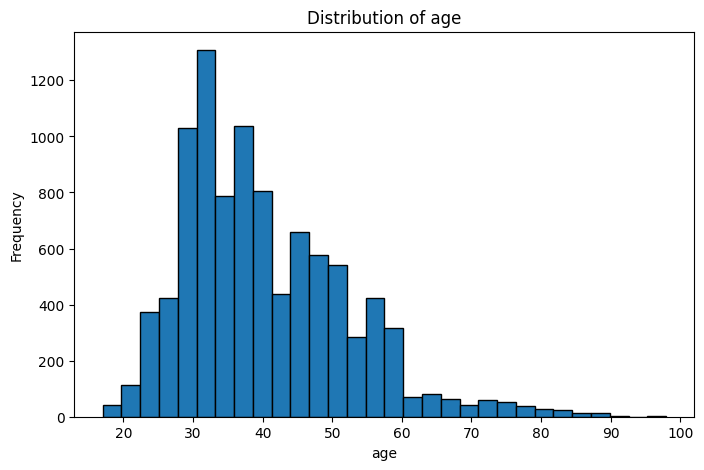

Skewness of age: 0.9903804270348292


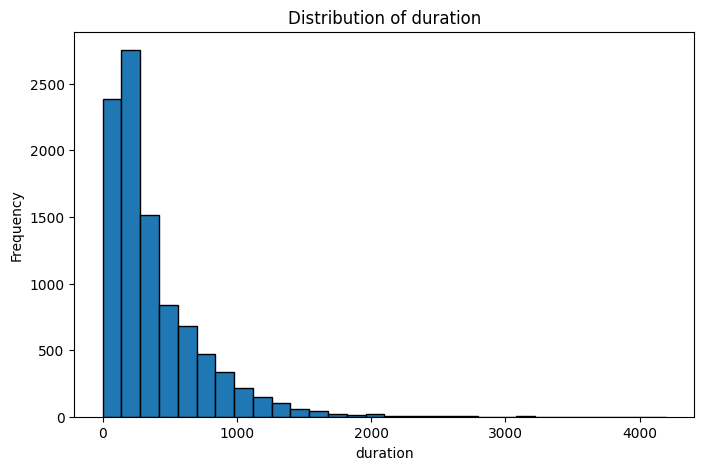

Skewness of duration: 2.2559705192271338


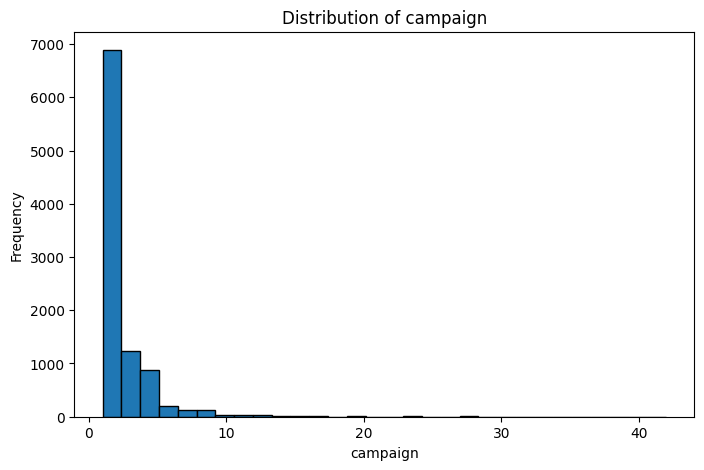

Skewness of campaign: 5.098047191490148


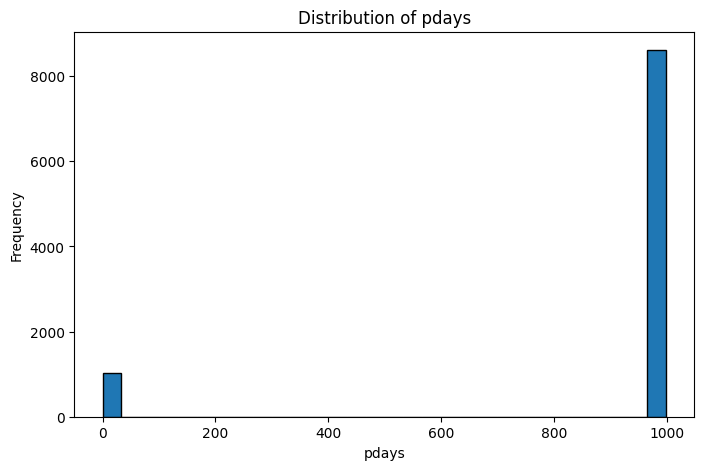

Skewness of pdays: -2.5489592677537245


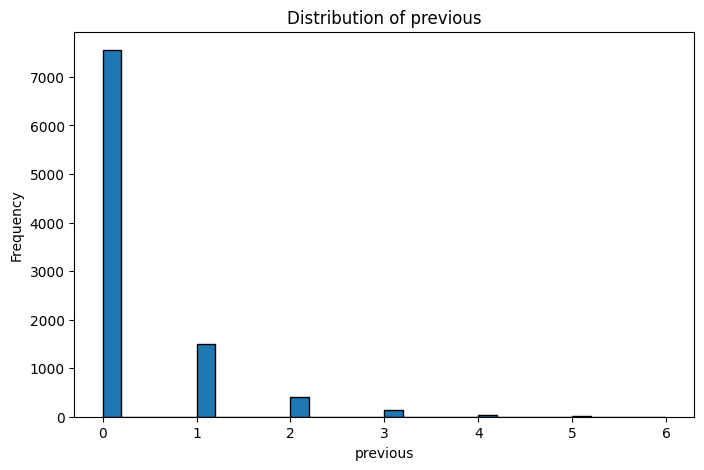

Skewness of previous: 2.8951485145735223


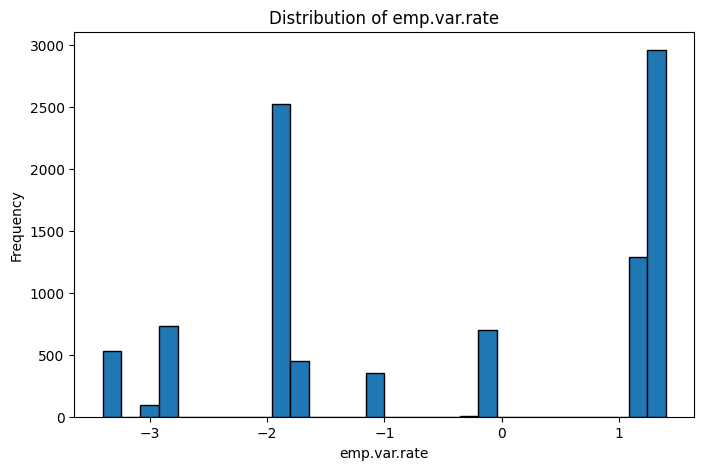

Skewness of emp.var.rate: -0.18120587625934212


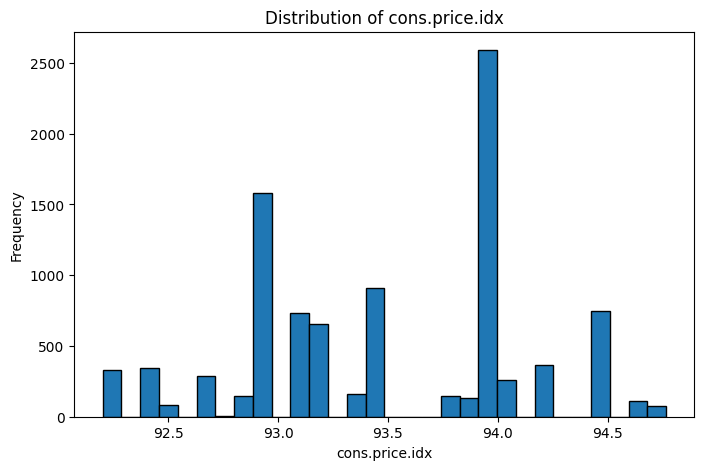

Skewness of cons.price.idx: -0.12519646060382836


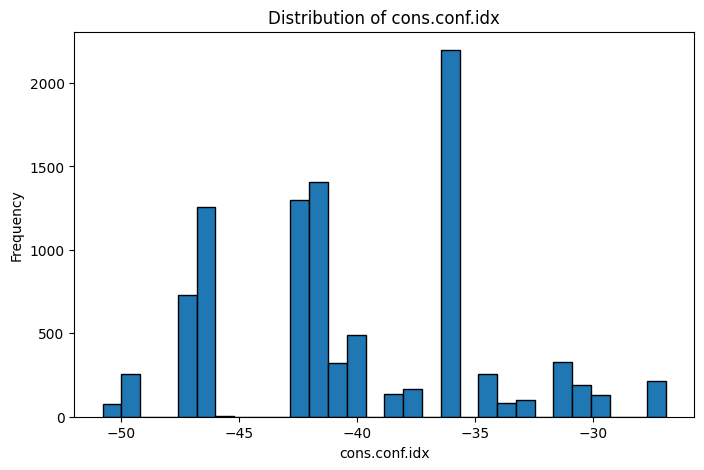

Skewness of cons.conf.idx: 0.3503869766778883


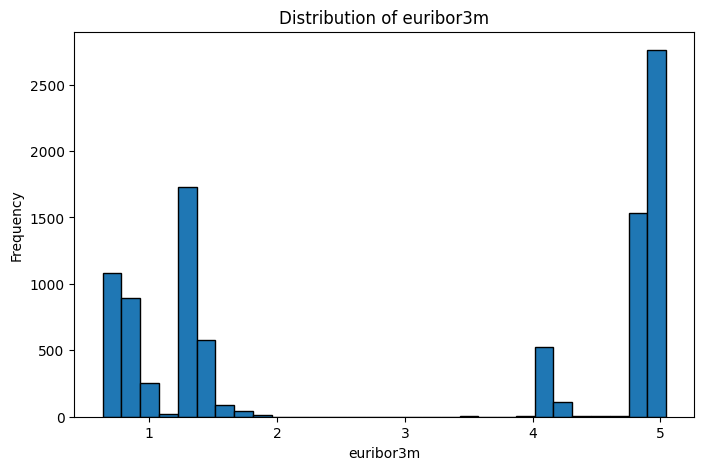

Skewness of euribor3m: -0.05832253579164721


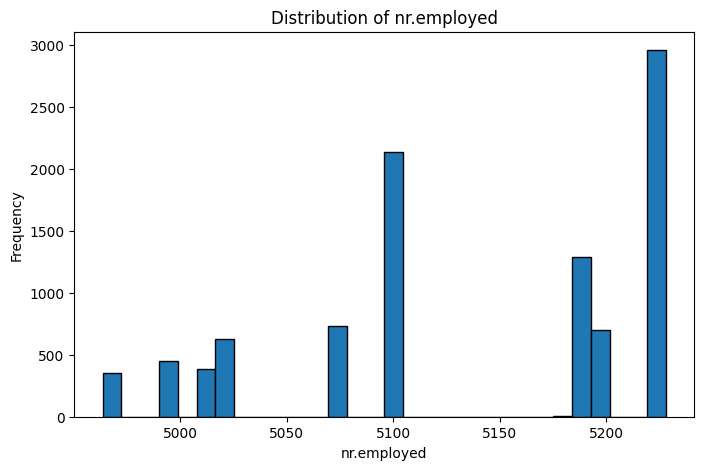

Skewness of nr.employed: -0.4635089005184345


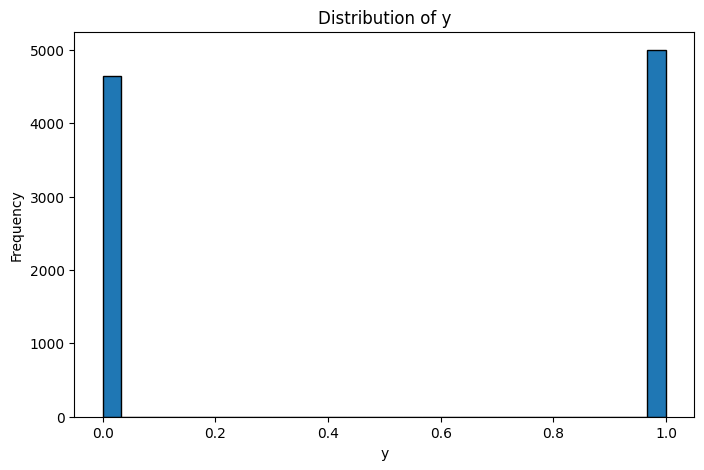

Skewness of y: -0.07474093186836626


In [13]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.title(f'Distribution of {column}')
    plt.hist(df[column], bins=30, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    skewness = skew(df[column])
    print(f'Skewness of {column}: {skewness}')


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Plot the distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

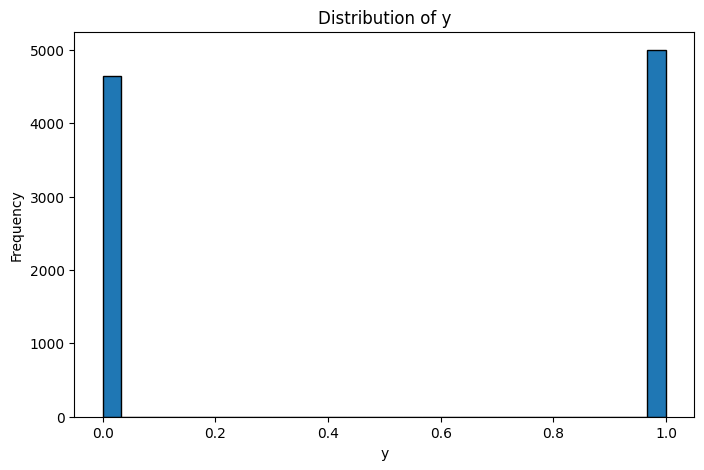

In [14]:
column='y'
plt.figure(figsize=(8, 5))
plt.title(f'Distribution of {column}')
plt.hist(df[column], bins=30, edgecolor='black')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Scale all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler= StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

<a id="logreg"> </a>
## 2. Logistic regression model

In [16]:
X = df.drop('y', axis=1)
y = df['y']
y = pd.cut(y, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
y_pred = log_reg_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       924
           1       0.86      0.85      0.86      1004

    accuracy                           0.85      1928
   macro avg       0.85      0.85      0.85      1928
weighted avg       0.85      0.85      0.85      1928

Accuracy: 0.8506224066390041


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>How does a unit change in each feature influence the odds of a client subscribed a term deposit or not?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
coefficients = log_reg_model.coef_[0]
feature_names = X.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df['Odds Ratio'] = coefficients_df['Coefficient'].apply(lambda x: round(np.exp(x), 4))
print(coefficients_df)

          Feature  Coefficient  Odds Ratio
0             age    -0.046293      0.9548
1        duration    -2.383158      0.0923
2        campaign     0.062372      1.0644
3           pdays     0.685895      1.9855
4        previous     0.223606      1.2506
5    emp.var.rate     1.589344      4.9005
6  cons.price.idx    -0.190979      0.8261
7   cons.conf.idx    -0.087747      0.9160
8       euribor3m    -0.960182      0.3828
9     nr.employed     1.141055      3.1301


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal threshold</b>
                </font>
            </div>
        </td>
    </tr>
</table>

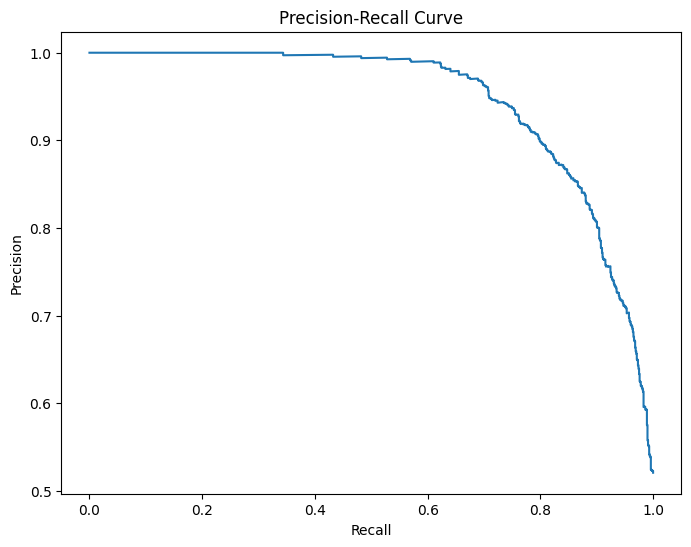

Optimal Threshold based on F1-score: 0.4623213092243197


In [18]:
y_probs = log_reg_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[f1_scores.argmax()]
print("Optimal Threshold based on F1-score:", optimal_threshold)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>For the full model, calculate the accuracy manually using the confusion matrix. Consider 0.5 as the probability threshold.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
y_probs = log_reg_model.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= 0.5).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Manually Calculated Accuracy:", accuracy)

Manually Calculated Accuracy: 0.8506224066390041


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Calculate value of kappa for the full model . Consider threshold value as 0.18</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
y_probs = log_reg_model.predict_proba(X_test)[:, 1]
threshold = 0.18
y_pred = (y_probs >= threshold).astype(int)
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.5436604073921827


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Calculate the cross entropy for the logistic regression model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
y_probs = log_reg_model.predict_proba(X_test)[:, 1]
y_test_numeric = y_test.cat.codes if y_test.dtype.name == 'category' else y_test
epsilon = 1e-15
cross_entropy = -np.mean(y_test_numeric * np.log(y_probs + epsilon) + (1 - y_test_numeric) * np.log(1 - y_probs + epsilon))
print("Cross-Entropy:", cross_entropy)

Cross-Entropy: 0.35904096666819635


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Predict whether a client subscribed a term deposit or not. For the logistic regression model find the following:<br> <ol type = "a">
                        <li> Precision </li>
                        <li> Recall</li>   
                        <li> F<sub>1</sub> score </li>
                        </ol>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
y_probs = log_reg_model.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= 0.5).astype(int)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       924
           1       0.86      0.85      0.86      1004

    accuracy                           0.85      1928
   macro avg       0.85      0.85      0.85      1928
weighted avg       0.85      0.85      0.85      1928



## 3.Build a Decision Tree model and generate a classification report.



In [23]:
X = df.drop('y', axis=1)
y = df['y']
y = pd.cut(y, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       924
           1       0.84      0.84      0.84      1004

    accuracy                           0.83      1928
   macro avg       0.83      0.83      0.83      1928
weighted avg       0.83      0.83      0.83      1928



<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal hyperparameters using GridSearchCV</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
X = df.drop('y', axis=1)
y = df['y']
y = pd.cut(y, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best Parameters:", best_params)
y_pred = best_estimator.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       924
           1       0.90      0.86      0.88      1004

    accuracy                           0.88      1928
   macro avg       0.88      0.88      0.88      1928
weighted avg       0.88      0.88      0.88      1928



<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
X = df.drop('y', axis=1)
y = df['y']
y = pd.cut(y, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
full_model = DecisionTreeClassifier(random_state=42)
full_model.fit(X_train, y_train)
y_pred_full = full_model.predict(X_test)
print("Performance of Full Model:")
print(classification_report(y_test, y_pred_full))
print("Accuracy of Full Model:", accuracy_score(y_test, y_pred_full))
optimized_model = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=optimized_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_estimator = grid_search.best_estimator_
y_pred_optimized = best_estimator.predict(X_test)
print("\nPerformance of Optimized Model:")
print(classification_report(y_test, y_pred_optimized))
print("Accuracy of Optimized Model:", accuracy_score(y_test, y_pred_optimized))


Performance of Full Model:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       924
           1       0.84      0.84      0.84      1004

    accuracy                           0.83      1928
   macro avg       0.83      0.83      0.83      1928
weighted avg       0.83      0.83      0.83      1928

Accuracy of Full Model: 0.8314315352697096
Fitting 5 folds for each of 90 candidates, totalling 450 fits

Performance of Optimized Model:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       924
           1       0.90      0.86      0.88      1004

    accuracy                           0.88      1928
   macro avg       0.88      0.88      0.88      1928
weighted avg       0.88      0.88      0.88      1928

Accuracy of Optimized Model: 0.8760373443983402


## 4.Build a Random Forest model with n_estimators=30 and generate a classification report.



In [26]:
X = df.drop('y', axis=1)
y = df['y']
y = pd.cut(y, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.85      0.92      0.88       924
           1       0.92      0.85      0.88      1004

    accuracy                           0.88      1928
   macro avg       0.89      0.89      0.88      1928
weighted avg       0.89      0.88      0.88      1928



<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal hyperparameters using GridSearchCV</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
X = df.drop('y', axis=1)
y = df['y']
y = pd.cut(y, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [10, 30, 50],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best Parameters:", best_params)
y_pred = best_estimator.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       924
           1       0.94      0.85      0.89      1004

    accuracy                           0.89      1928
   macro avg       0.90      0.89      0.89      1928
weighted avg       0.90      0.89      0.89      1928



<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
X = df.drop('y', axis=1)
y = df['y']
y = pd.cut(y, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
full_model = RandomForestClassifier(random_state=42)
full_model.fit(X_train, y_train)
y_pred_full = full_model.predict(X_test)
print("Performance of Full Model:")
print(classification_report(y_test, y_pred_full))
print("Accuracy of Full Model:", accuracy_score(y_test, y_pred_full))
optimized_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [10, 30, 50],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=optimized_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_estimator = grid_search.best_estimator_
y_pred_optimized = best_estimator.predict(X_test)
print("\nPerformance of Optimized Model:")
print(classification_report(y_test, y_pred_optimized))
print("Accuracy of Optimized Model:", accuracy_score(y_test, y_pred_optimized))


Performance of Full Model:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       924
           1       0.92      0.85      0.89      1004

    accuracy                           0.89      1928
   macro avg       0.89      0.89      0.89      1928
weighted avg       0.89      0.89      0.89      1928

Accuracy of Full Model: 0.8853734439834025
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Performance of Optimized Model:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       924
           1       0.94      0.85      0.89      1004

    accuracy                           0.89      1928
   macro avg       0.90      0.89      0.89      1928
weighted avg       0.90      0.89      0.89      1928

Accuracy of Optimized Model: 0.8931535269709544


## 5.Build the XGBoost model with a learning rate of 0.4 and gamma equal to 3. Calculate the accuracy by plotting the confusion matrix

Accuracy: 0.8879668049792531


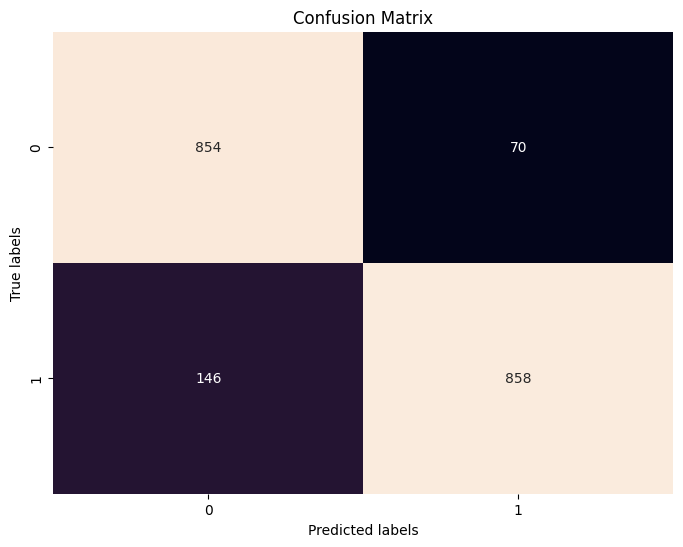

In [29]:
X = df.drop('y', axis=1)
y = df['y']
y = pd.cut(y, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(learning_rate=0.4, gamma=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,annot=True,fmt="d",cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal hyperparameters using GridSearchCV</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'gamma': 2, 'learning_rate': 0.2}
Accuracy: 0.8895228215767634


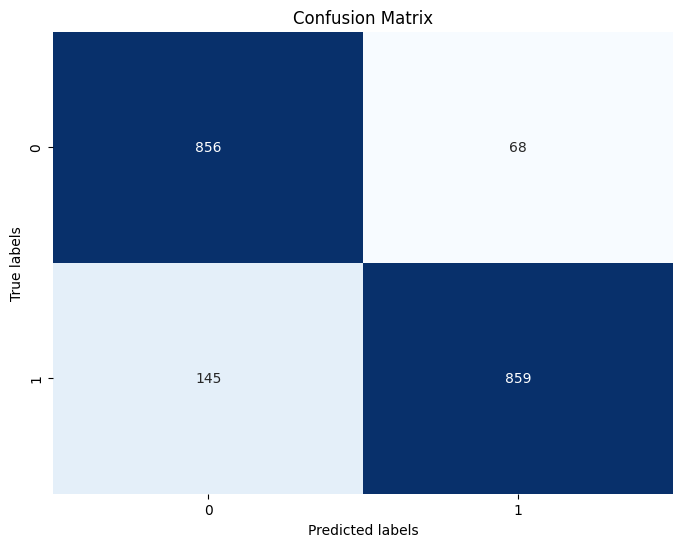

In [30]:
X = df.drop('y', axis=1)
y = df['y']
y = pd.cut(y, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier()
param_grid = {
    'learning_rate': [0.1, 0.2, 0.4],
    'gamma': [0, 1, 2, 3]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best Parameters:", best_params)
y_pred = best_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
X = df.drop('y', axis=1)
y = df['y']
y = pd.cut(y, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
full_model = xgb.XGBClassifier(random_state=42)
full_model.fit(X_train, y_train)
y_pred_full = full_model.predict(X_test)
print("Performance of Full Model:")
print(classification_report(y_test, y_pred_full))
print("Accuracy of Full Model:", accuracy_score(y_test, y_pred_full))
optimized_model = xgb.XGBClassifier()
param_grid = {
    'learning_rate': [0.1, 0.2, 0.4],
    'gamma': [0, 1, 2, 3]
}
grid_search = GridSearchCV(estimator=optimized_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_estimator = grid_search.best_estimator_
y_pred_optimized = best_estimator.predict(X_test)
print("\nPerformance of Optimized Model:")
print(classification_report(y_test, y_pred_optimized))
print("Accuracy of Optimized Model:", accuracy_score(y_test, y_pred_optimized))


Performance of Full Model:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       924
           1       0.91      0.85      0.88      1004

    accuracy                           0.88      1928
   macro avg       0.88      0.88      0.88      1928
weighted avg       0.88      0.88      0.88      1928

Accuracy of Full Model: 0.8807053941908713
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Performance of Optimized Model:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       924
           1       0.93      0.86      0.89      1004

    accuracy                           0.89      1928
   macro avg       0.89      0.89      0.89      1928
weighted avg       0.89      0.89      0.89      1928

Accuracy of Optimized Model: 0.8895228215767634


## 6.Build the K - Nearest Neighbor Model

In [32]:
X = df.drop('y', axis=1)
y = df['y']
y = pd.cut(y, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.866701244813278
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       924
           1       0.90      0.84      0.87      1004

    accuracy                           0.87      1928
   macro avg       0.87      0.87      0.87      1928
weighted avg       0.87      0.87      0.87      1928



<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal K-Value using Elbow Curve Method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

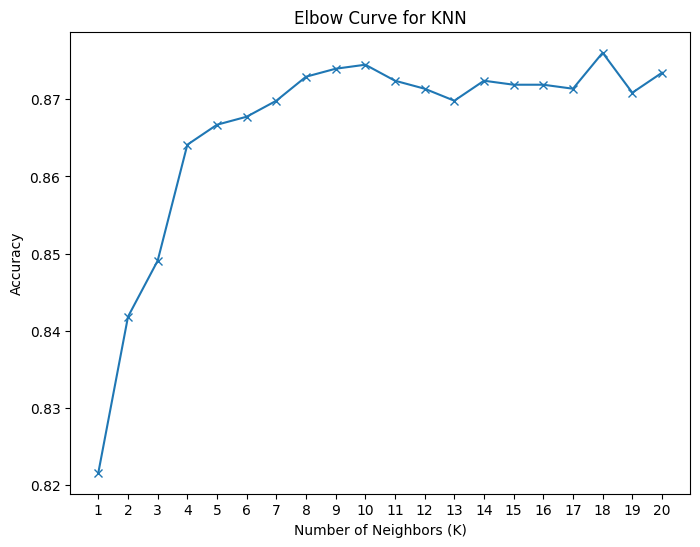

In [33]:
X = df.drop('y', axis=1)
y = df['y']
y = pd.cut(y, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
k_values = range(1, 21)
accuracy_values = []
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_values,marker='x')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Elbow Curve for KNN')
plt.xticks(k_values)
plt.show()


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
X = df.drop('y', axis=1)
y = df['y']
y = pd.cut(y, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
full_model = KNeighborsClassifier(n_neighbors=5)
full_model.fit(X_train, y_train)
y_pred_full = full_model.predict(X_test)
print("Performance of Full Model:")
print(classification_report(y_test, y_pred_full))
print("Accuracy of Full Model:", accuracy_score(y_test, y_pred_full))
optimal_k = 18
optimized_model = KNeighborsClassifier(n_neighbors=optimal_k)
optimized_model.fit(X_train, y_train)
y_pred_optimized = optimized_model.predict(X_test)
print("\nPerformance of Optimized Model (K =", optimal_k, "):")
print(classification_report(y_test, y_pred_optimized))
print("Accuracy of Optimized Model:", accuracy_score(y_test, y_pred_optimized))


Performance of Full Model:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       924
           1       0.90      0.84      0.87      1004

    accuracy                           0.87      1928
   macro avg       0.87      0.87      0.87      1928
weighted avg       0.87      0.87      0.87      1928

Accuracy of Full Model: 0.866701244813278

Performance of Optimized Model (K = 18 ):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       924
           1       0.92      0.84      0.88      1004

    accuracy                           0.88      1928
   macro avg       0.88      0.88      0.88      1928
weighted avg       0.88      0.88      0.88      1928

Accuracy of Optimized Model: 0.8760373443983402


## 7. Build the Naive Bayes Model

In [35]:
X = df.drop('y', axis=1)
y = df['y']
y = pd.cut(y, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.7847510373443983
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       924
           1       0.78      0.82      0.80      1004

    accuracy                           0.78      1928
   macro avg       0.79      0.78      0.78      1928
weighted avg       0.79      0.78      0.78      1928



<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the classification results of Gaussian, Bernoulli and Multinomial Naive Bayes</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
X = df.drop('y', axis=1)
y = df['y']
y = pd.cut(y, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_pred_gaussian = gaussian_nb.predict(X_test)

bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)
y_pred_bernoulli = bernoulli_nb.predict(X_test)

X_shifted = X + abs(X.min()) + 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_shifted)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train, y_train)
y_pred_multinomial = multinomial_nb.predict(X_test)

print("Gaussian Naive Bayes:")
print(classification_report(y_test, y_pred_gaussian))
print("Accuracy:", accuracy_score(y_test, y_pred_gaussian))

print("\nBernoulli Naive Bayes:")
print(classification_report(y_test, y_pred_bernoulli))
print("Accuracy:", accuracy_score(y_test, y_pred_bernoulli))

print("\nMultinomial Naive Bayes:")
print(classification_report(y_test, y_pred_multinomial))
print("Accuracy:", accuracy_score(y_test, y_pred_multinomial))


Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       924
           1       0.78      0.82      0.80      1004

    accuracy                           0.78      1928
   macro avg       0.79      0.78      0.78      1928
weighted avg       0.79      0.78      0.78      1928

Accuracy: 0.7847510373443983

Bernoulli Naive Bayes:
              precision    recall  f1-score   support

           0       0.69      0.70      0.70       924
           1       0.72      0.70      0.71      1004

    accuracy                           0.70      1928
   macro avg       0.70      0.70      0.70      1928
weighted avg       0.70      0.70      0.70      1928

Accuracy: 0.7043568464730291

Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.78      0.65      0.70       924
           1       0.72      0.83      0.77      1004

    accuracy                           0.74      192

## 8. Compare the results of all above mentioned algorithms

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare all the classification models using model performance evaluation metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XG Boost': XGBClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    print("------------------------------")



Model: Logistic Regression
Accuracy: 0.8387, Precision: 0.8462, Recall: 0.8436, F1-score: 0.8449
------------------------------
Model: Decision Tree
Accuracy: 0.8309, Precision: 0.8376, Recall: 0.8376, F1-score: 0.8376
------------------------------
Model: Random Forest
Accuracy: 0.8833, Precision: 0.9193, Recall: 0.8506, F1-score: 0.8836
------------------------------
Model: XG Boost
Accuracy: 0.8807, Precision: 0.9117, Recall: 0.8536, F1-score: 0.8817
------------------------------
Model: KNN
Accuracy: 0.8615, Precision: 0.8950, Recall: 0.8317, F1-score: 0.8622
------------------------------
Model: Naive Bayes
Accuracy: 0.7848, Precision: 0.7797, Recall: 0.8177, F1-score: 0.7982
------------------------------


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare all the classification models using their ROC curves.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

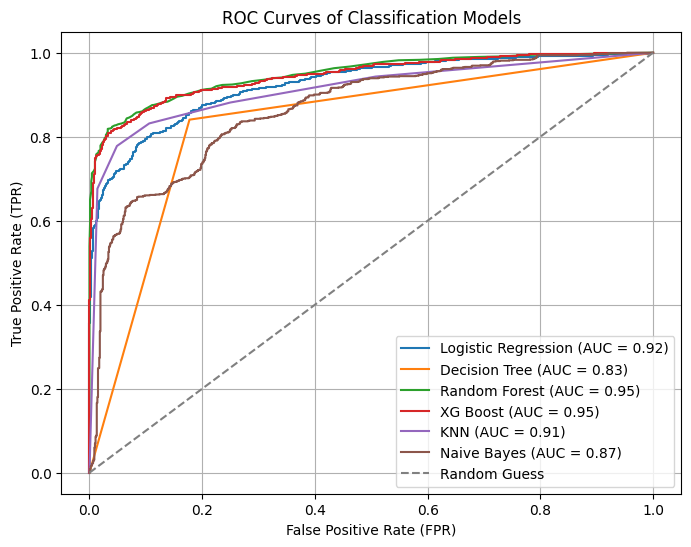

In [38]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XG Boost': XGBClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}
plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves of Classification Models')
plt.legend()
plt.grid()
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>comput cross entropy and Compare all the classification models.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XG Boost': XGBClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}
cross_entropies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)
    cross_entropy = log_loss(y_test, y_probs)
    cross_entropies[name] = cross_entropy
for name, cross_entropy in cross_entropies.items():
    print(f"Model: {name} - Cross-Entropy: {cross_entropy:.4f}")


Model: Logistic Regression - Cross-Entropy: 0.3680
Model: Decision Tree - Cross-Entropy: 6.0945
Model: Random Forest - Cross-Entropy: 0.3060
Model: XG Boost - Cross-Entropy: 0.2891
Model: KNN - Cross-Entropy: 1.5250
Model: Naive Bayes - Cross-Entropy: 1.1050


## 9. Intrepret your solution based on the results

From the data set given I understood and build a model from that the I have sorted the best 3 models:
1.	Model: Random Forest
Accuracy: 89%, Precision: 93%, Recall: 84%, F1-score: 88%
Random forest is the best model.
2.	Model: XG Boost
Accuracy: 88%, Precision: 91%, Recall: 85%, F1-score: 88%
XG Boost has the 2nd best model.
3.	Model: KNN
Accuracy: 86%, Precision: 89%, Recall: 83%, F1-score: 86%
KNN has the 3rd best model almost similar to XG Boosting.
----------------------------------------
Among the models used for testing Naïve Bayes has the worst model:

Model: Naive Bayes
Accuracy: 78%, Precision: 77%, Recall: 81%, F1-score: 79%
